일정 시간동안 대여x, 
대여 시간이 매우 짧으면서 대여장소와 반납장소가 같은 자전거는 고장 신고/수리 내역에 있을 것이다.
(내역에 없다면 고장이 발생했을 가능성이 크다.)

In [3]:
import pandas as pd
df = pd.read_parquet('G:\내 드라이브\DataSet\_파킷 파일\서울특별시 공공자전거 대여이력 정보/서울특별시 공공자전거 대여이력 정보_2021_preprocessed.parquet')
df

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\user\AppData\Local\Temp\ipykernel_12160\1237595030.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_parquet('G:\내 드라이브\DataSet\_파킷 파일\서울특별시 공공자전거 대여이력 정보/서울특별시 공공자전거 대여이력 정보_2021_preprocessed.parquet')


OSError: [Errno 22] Invalid argument

In [14]:
df.columns

Index(['자전거번호', '대여대여소번호', '대여대여소명', '대여거치대', '반납대여소번호', '반납대여소명', '반납거치대',
       '이용시간(분)', '이용거리(M)', '대여일자', '대여시간', '반납일자', '반납시간', '대여시간차',
       '이용시간-대여시간차', '이용속도(km/h)'],
      dtype='object')

In [15]:
import pandas as pd

# 대여 시간이 짧고(5분 미만) 대여 장소와 반납 장소가 같은 자전거만 필터링
short_duration_same_location = df[(df['이용시간(분)'] < 5) & (df['대여대여소번호'] == df['반납대여소번호'])]

# 조건에 맞는 자전거 번호의 고유값만 추출
unique_bike_numbers = short_duration_same_location['자전거번호'].unique()

print(unique_bike_numbers)
print(len(unique_bike_numbers))

['SPB-53909' 'SPB-36252' 'SPB-47049' ... 'SPB-58294' 'SPB-82158'
 'SPB-49412']
27521


In [16]:
short_duration_same_location['자전거번호'].value_counts()

자전거번호
SPB-34075    159
SPB-30084    113
SPB-30046     88
SPB-45560     62
SPB-39314     32
            ... 
SPB-56390      1
SPB-83956      1
SPB-58318      1
SPB-83751      1
SPB-49221      1
Name: count, Length: 27521, dtype: int64

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 

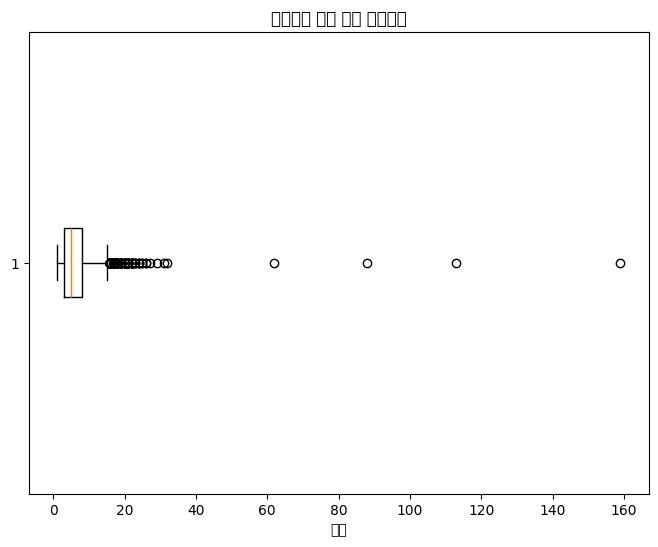

In [17]:
import matplotlib.pyplot as plt

# 자전거별 횟수 데이터 추출
bike_counts = short_duration_same_location['자전거번호'].value_counts()

# 박스플롯 생성
plt.figure(figsize=(8, 6))
plt.boxplot(bike_counts, vert=False)
plt.xlabel('횟수')
plt.title('자전거별 이용 횟수 박스플롯')
plt.show()

In [18]:
# 자전거별 횟수 데이터 추출
bike_counts = short_duration_same_location['자전거번호'].value_counts()

# 중앙값과 평균 계산
median_value = bike_counts.median()
mean_value = bike_counts.mean()

print(f"중앙값: {median_value}")
print(f"평균: {mean_value}")

중앙값: 5.0
평균: 5.986773736419462


In [23]:
import numpy as np

# 자전거별 횟수 데이터 추출
bike_counts = short_duration_same_location['자전거번호'].value_counts()

# IQR 계산
Q1 = bike_counts.quantile(0.25)
Q3 = bike_counts.quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준: Q3 + 1.5 * IQR보다 큰 값
outlier_threshold = Q3 + 1.5 * IQR
outliers = bike_counts[bike_counts > outlier_threshold]

# 결과 출력
print("이상치에 해당하는 자전거 번호와 대여 횟수:")
print(outliers)

이상치에 해당하는 자전거 번호와 대여 횟수:
자전거번호
SPB-34075    159
SPB-30084    113
SPB-30046     88
SPB-45560     62
SPB-39314     32
            ... 
SPB-30547     16
SPB-33623     16
SPB-80434     16
SPB-32979     16
SPB-80379     16
Name: count, Length: 367, dtype: int64


In [24]:
# 자전거별 횟수 데이터 추출
bike_counts = short_duration_same_location['자전거번호'].value_counts()

# 대여 횟수가 5번을 초과하는 자전거 번호 필터링
bikes_over_5 = bike_counts[bike_counts > 5]

# 결과 출력
print(bikes_over_5)

자전거번호
SPB-34075    159
SPB-30084    113
SPB-30046     88
SPB-45560     62
SPB-39314     32
            ... 
SPB-48689      6
SPB-33938      6
SPB-54499      6
SPB-43004      6
SPB-39800      6
Name: count, Length: 13723, dtype: int64


In [25]:
# 대여일자와 반납일자가 같은 행 필터링
same_date_rentals = df[df['대여일자'] == df['반납일자']]

# 결과 출력
print(same_date_rentals)

              자전거번호 대여대여소번호   대여대여소명 대여거치대 반납대여소번호             반납대여소명  반납거치대  \
2         SPB-50952   00003     중랑센터     0   00668       서울축산농협(장안지점)      0   
4         SPB-52380   00003     중랑센터     0   00540    군자역 7번출구 베스트샵 앞      0   
5         SPB-30541   00003     중랑센터     0   00594  중랑물재생센터(서울새활용플라자)      0   
6         SPB-53160   00003     중랑센터     0   00668       서울축산농협(장안지점)      0   
7         SPB-04151   00003     중랑센터     7   00529       장한평역 8번 출구 앞      1   
...             ...     ...      ...   ...     ...                ...    ...   
30788780  SPB-40454   09999     상담센터     0   03879     중랑천 뚝방길 산책로 입구      0   
30788781  SPB-48452   09999     상담센터     0   00622          전농사거리 교통섬      0   
30788784  SPB-51134   09999     상담센터     0   01986            태평양물산빌딩      0   
30788785  SPB-37732   09999     상담센터     0   00188        홍은동 정원여중 입구      0   
30788787  SPB-53564   99999  영남단말기정비     0   09998         영남주차장 정비센터      0   

          이용시간(분)   이용거리(M)        대여일자

In [26]:
# 대여일자와 반납일자가 다른 경우의 개수 계산
different_date_count = (df['대여일자'] != df['반납일자']).sum()

print(f"대여일자와 반납일자가 다른 개수: {different_date_count}")

대여일자와 반납일자가 다른 개수: 300924


In [20]:
import pandas as pd

# filtered_df2의 자전거번호 목록 추출
filtered_bike_numbers = filtered_df2['자전거번호'].unique()

# missing_bikes_sorted에서 filtered_df2에 없는 자전거번호만 필터링
unique_missing_bikes = missing_bikes_sorted[~missing_bikes_sorted['자전거번호'].isin(filtered_bike_numbers)]

# 대여시간이 짧으면서 대여장소와 반납장소가 같은데 전체기간 고장신고 내역에 없는 자전거 대여이력 정보
display(unique_missing_bikes)

,자전거번호,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간
0,SPB-84546,04713,04713,0.0,0.0,2024-06-30,23:35:00,2024-06-30,23:35:26
1,SPB-84990,00502,00502,0.0,10.0,2024-06-30,15:45:47,2024-06-30,15:46:26
2,SPB-80312,02701,02701,2.0,130.0,2024-06-30,17:36:32,2024-06-30,17:39:03
3,SPB-82718,00565,00565,2.0,0.0,2024-06-30,17:33:02,2024-06-30,17:35:32
4,SPB-60868,04092,04092,0.0,0.0,2024-06-30,17:28:48,2024-06-30,17:29:35
...,...,...,...,...,...,...,...,...,...
57422,SPB-20618,00900,00900,2.0,0.0,2020-01-09,20:38:19,2020-01-09,20:40:23
57424,SPB-09325,00371,00371,2.0,30.0,2020-01-09,23:20:07,2020-01-09,23:22:24
57508,SPB-18868,00179,00179,4.0,650.0,2020-01-02,13:46:10,2020-01-02,13:51:36
57523,SPB-10218,01160,01160,4.0,0.0,2020-01-01,04:35:06,2020-01-01,04:39:42


In [27]:
# 전체 데이터 개수
total_count = len(df)

# 대여일자와 반납일자가 같은 경우의 개수
same_date_count = (df['대여일자'] == df['반납일자']).sum()

# 대여일자와 반납일자가 다른 경우의 개수
different_date_count = total_count - same_date_count

print(f"전체 데이터 개수: {total_count}")
print(f"대여일자와 반납일자가 같은 개수: {same_date_count}")
print(f"대여일자와 반납일자가 다른 개수: {different_date_count}")

전체 데이터 개수: 27493559
대여일자와 반납일자가 같은 개수: 27192635
대여일자와 반납일자가 다른 개수: 300924


In [28]:
# 날짜 형식으로 변환 (필요한 경우)
df['대여일자'] = pd.to_datetime(df['대여일자'])
df['반납일자'] = pd.to_datetime(df['반납일자'])

# 대여일자와 반납일자가 다른 경우 필터링 및 일수 차이 계산
df['일수 차이'] = (df['반납일자'] - df['대여일자']).dt.days
different_date_days = df[df['대여일자'] != df['반납일자']]['일수 차이']

# 결과 출력
print(different_date_days)

310         1
477         1
706         1
707         1
814         1
           ..
30788574    1
30788575    1
30788596    1
30788610    1
30788776    1
Name: 일수 차이, Length: 300924, dtype: int64


In [29]:
# 날짜 형식으로 변환 (필요한 경우)
df['대여일자'] = pd.to_datetime(df['대여일자'])
df['반납일자'] = pd.to_datetime(df['반납일자'])

# 대여일자와 반납일자가 다른 경우의 일수 차이 계산
df['일수 차이'] = (df['반납일자'] - df['대여일자']).dt.days
different_date_days = df[df['대여일자'] != df['반납일자']]['일수 차이']

# 최대 일수 차이 계산
max_difference = different_date_days.max()
print(f"대여일자와 반납일자가 다른 경우의 최대 일수 차이: {max_difference}일")

대여일자와 반납일자가 다른 경우의 최대 일수 차이: 2일


In [31]:
# 날짜 형식으로 변환 (필요한 경우)
df['대여일자'] = pd.to_datetime(df['대여일자'])
df['반납일자'] = pd.to_datetime(df['반납일자'])

# 일수 차이 계산
df['일수 차이'] = (df['반납일자'] - df['대여일자']).dt.days

# 일수 차이가 1인 경우 필터링
one_day_difference = df[df['일수 차이'] == 1]

# 결과 출력
display(one_day_difference)

,자전거번호,대여대여소번호,대여대여소명,대여거치대,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간,대여시간차,이용시간-대여시간차,이용속도(km/h),일수 차이
310,SPB-52250,00101,(구)합정동 주민센터,0,00101,(구)합정동 주민센터,0,120.0,25819.98,2021-01-15,22:49:35,2021-01-16,00:50:00,0 days 02:00:25,-0.416667,12.909990,1
477,SPB-39209,00101,(구)합정동 주민센터,0,00103,망원역 2번출구 앞,0,116.0,8662.43,2021-01-26,23:16:43,2021-01-27,01:13:30,0 days 01:56:47,-0.783333,4.480567,1
706,SPB-50112,00102,망원역 1번출구 앞,0,00102,망원역 1번출구 앞,0,105.0,14148.56,2021-01-05,22:26:02,2021-01-06,00:11:09,0 days 01:45:07,-0.116667,8.084891,1
707,SPB-51318,00102,망원역 1번출구 앞,0,00102,망원역 1번출구 앞,0,105.0,14301.57,2021-01-05,22:25:55,2021-01-06,00:11:25,0 days 01:45:30,-0.500000,8.172326,1
814,SPB-53226,00102,망원역 1번출구 앞,0,00493,홍대입구역 6번출구,0,72.0,1894.37,2021-01-11,23:18:27,2021-01-12,00:30:32,0 days 01:12:05,-0.083333,1.578642,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30788574,SPB-49119,04869,잠실나들목6,0,04869,잠실나들목6,0,24.0,6820.00,2021-12-11,23:55:16,2021-12-12,00:20:09,0 days 00:24:53,-0.883333,17.050000,1
30788575,SPB-49553,04869,잠실나들목6,0,02635,잠실새내역 1번출구,0,92.0,1110.00,2021-12-11,23:53:54,2021-12-12,01:25:59,0 days 01:32:05,-0.083333,0.723913,1
30788596,SPB-38866,04869,잠실나들목6,0,04869,잠실나들목6,0,45.0,2343.21,2021-12-13,23:44:00,2021-12-14,00:29:50,0 days 00:45:50,-0.833333,3.124280,1
30788610,SPB-57647,04869,잠실나들목6,0,01297,석촌호수교차로(동호 팔각정 앞),0,19.0,2480.00,2021-12-15,23:52:16,2021-12-16,00:11:46,0 days 00:19:30,-0.500000,7.831579,1


In [ ]:
import pandas as pd

# 1일 이상인 행 필터링
one_day_or_more = df[df['대여시간차'] >= pd.Timedelta('1 days')]

# 결과 출력
print(one_day_or_more)

In [57]:
print(unique_missing_bikes['자전거번호'].unique())
print(len(unique_missing_bikes['자전거번호'].unique()))

['SPB-84546' 'SPB-84990' 'SPB-80312' ... 'SPB-09325' 'SPB-18868'
 'SPB-08579']
1245


In [43]:
import pandas as pd

# 대여일자를 datetime 형식으로 변환
unique_missing_bikes['대여일자'] = pd.to_datetime(unique_missing_bikes['대여일자'])

# 대여일자를 연도(YYYY) 형식으로 변환하여 새로운 컬럼 추가
unique_missing_bikes['연도'] = unique_missing_bikes['대여일자'].dt.year

# 자전거번호와 연도별로 그룹화하여 빈도 계산
yearly_bike_frequency = unique_missing_bikes.groupby(['자전거번호', '연도']).size().reset_index(name='빈도')

display(yearly_bike_frequency)

C:\Users\user\AppData\Local\Temp\ipykernel_16316\260967231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_missing_bikes['대여일자'] = pd.to_datetime(unique_missing_bikes['대여일자'])
C:\Users\user\AppData\Local\Temp\ipykernel_16316\260967231.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_missing_bikes['연도'] = unique_missing_bikes['대여일자'].dt.year


,자전거번호,연도,빈도
0,SPB-00823,2020,1
1,SPB-01138,2020,3
2,SPB-01876,2020,2
3,SPB-02974,2020,3
4,SPB-03321,2020,4
...,...,...,...
3159,SPB-84999,2023,8
3160,SPB-90002,2020,1
3161,SPB-90003,2020,1
3162,SPB-90004,2020,1


In [71]:
print(yearly_bike_frequency['자전거번호'].unique())
print(len(yearly_bike_frequency['자전거번호'].unique()))

['SPB-00823' 'SPB-01138' 'SPB-01876' ... 'SPB-90003' 'SPB-90004'
 'SPB-90005']
1245


In [81]:
display(yearly_bike_frequency[(yearly_bike_frequency['빈도'] >= 2) & (yearly_bike_frequency['연도'] == 2024)])

,자전거번호,연도,빈도
160,SPB-44342,2024,5
167,SPB-49268,2024,6
170,SPB-58904,2024,8
171,SPB-58909,2024,5
173,SPB-58926,2024,19
...,...,...,...
3145,SPB-84966,2024,12
3148,SPB-84975,2024,20
3151,SPB-84976,2024,7
3154,SPB-84990,2024,17


In [87]:
print(len(yearly_bike_frequency[(yearly_bike_frequency['빈도'] >= 2) & (yearly_bike_frequency['연도'] == 2024)]['자전거번호'].unique()))
print(yearly_bike_frequency[(yearly_bike_frequency['빈도'] >= 2) & (yearly_bike_frequency['연도'] == 2024)]['자전거번호'].unique())

954
['SPB-44342' 'SPB-49268' 'SPB-58904' 'SPB-58909' 'SPB-58926' 'SPB-58928'
 'SPB-59077' 'SPB-59650' 'SPB-60311' 'SPB-60345' 'SPB-60868' 'SPB-60955'
 'SPB-61032' 'SPB-61160' 'SPB-61246' 'SPB-61962' 'SPB-62253' 'SPB-63410'
 'SPB-64568' 'SPB-65195' 'SPB-65508' 'SPB-66799' 'SPB-67720' 'SPB-67901'
 'SPB-67952' 'SPB-68028' 'SPB-68114' 'SPB-68117' 'SPB-68118' 'SPB-68120'
 'SPB-68121' 'SPB-68123' 'SPB-68125' 'SPB-68126' 'SPB-68127' 'SPB-68133'
 'SPB-68134' 'SPB-68135' 'SPB-68136' 'SPB-68144' 'SPB-68145' 'SPB-68146'
 'SPB-68148' 'SPB-68155' 'SPB-68161' 'SPB-68162' 'SPB-68166' 'SPB-68168'
 'SPB-68170' 'SPB-68173' 'SPB-68174' 'SPB-68175' 'SPB-68179' 'SPB-68184'
 'SPB-68189' 'SPB-68196' 'SPB-68198' 'SPB-68253' 'SPB-68280' 'SPB-68310'
 'SPB-68330' 'SPB-68337' 'SPB-68383' 'SPB-68384' 'SPB-68477' 'SPB-68488'
 'SPB-68602' 'SPB-68674' 'SPB-68760' 'SPB-68780' 'SPB-68848' 'SPB-68852'
 'SPB-68892' 'SPB-68895' 'SPB-68910' 'SPB-68936' 'SPB-68962' 'SPB-68984'
 'SPB-69052' 'SPB-69103' 'SPB-69128' 'SPB-69133

In [93]:
# 조건에 맞는 연도 필터링 후 고유한 자전거번호 개수 확인
filtered_year_2024 = yearly_bike_frequency[yearly_bike_frequency['연도'] == 2024]

# 고유한 자전거번호의 개수
print(len(filtered_year_2024['자전거번호'].unique()))

# 고유한 자전거번호 리스트 출력
print(filtered_year_2024['자전거번호'].unique())

972
['SPB-44342' 'SPB-49268' 'SPB-58904' 'SPB-58909' 'SPB-58926' 'SPB-58928'
 'SPB-59077' 'SPB-59650' 'SPB-60311' 'SPB-60345' 'SPB-60868' 'SPB-60955'
 'SPB-61032' 'SPB-61160' 'SPB-61246' 'SPB-61962' 'SPB-62253' 'SPB-62622'
 'SPB-63410' 'SPB-64568' 'SPB-65195' 'SPB-65508' 'SPB-66799' 'SPB-67720'
 'SPB-67901' 'SPB-67952' 'SPB-68028' 'SPB-68114' 'SPB-68117' 'SPB-68118'
 'SPB-68120' 'SPB-68121' 'SPB-68123' 'SPB-68125' 'SPB-68126' 'SPB-68127'
 'SPB-68133' 'SPB-68134' 'SPB-68135' 'SPB-68136' 'SPB-68138' 'SPB-68144'
 'SPB-68145' 'SPB-68146' 'SPB-68148' 'SPB-68155' 'SPB-68161' 'SPB-68162'
 'SPB-68166' 'SPB-68168' 'SPB-68170' 'SPB-68173' 'SPB-68174' 'SPB-68175'
 'SPB-68179' 'SPB-68184' 'SPB-68189' 'SPB-68196' 'SPB-68198' 'SPB-68253'
 'SPB-68280' 'SPB-68310' 'SPB-68330' 'SPB-68337' 'SPB-68383' 'SPB-68384'
 'SPB-68477' 'SPB-68488' 'SPB-68602' 'SPB-68674' 'SPB-68760' 'SPB-68780'
 'SPB-68848' 'SPB-68852' 'SPB-68892' 'SPB-68895' 'SPB-68910' 'SPB-68936'
 'SPB-68962' 'SPB-68984' 'SPB-69052' 'SPB-69103

짧은 대여 빈도와 고장 신고 빈도의 상관계수: 0.54


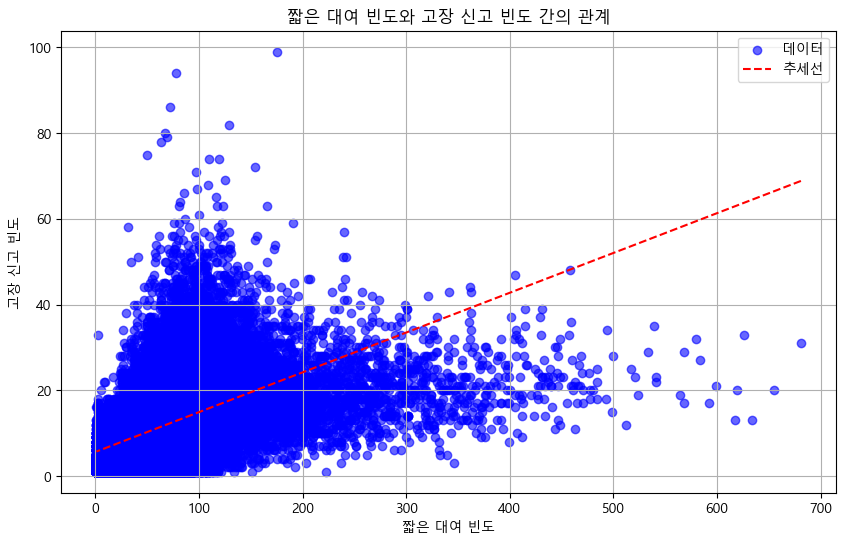

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# short_duration_same_location에서 자전거번호별 짧은 대여 빈도 계산
short_rental_counts = short_duration_same_location['자전거번호'].value_counts().reset_index()
short_rental_counts.columns = ['자전거번호', '짧은대여빈도']

# filtered_faults에서 자전거번호별 고장 신고 빈도 계산
fault_counts = filtered_faults['자전거번호'].value_counts().reset_index()
fault_counts.columns = ['자전거번호', '고장신고빈도']

# 짧은대여빈도와 고장신고빈도를 자전거번호를 기준으로 병합
combined_counts = pd.merge(short_rental_counts, fault_counts, on='자전거번호', how='inner')

# 짧은 대여 빈도와 고장 신고 빈도 간의 상관계수 계산
correlation = combined_counts['짧은대여빈도'].corr(combined_counts['고장신고빈도'])
print(f"짧은 대여 빈도와 고장 신고 빈도의 상관계수: {correlation:.2f}")

# 산점도와 추세선 추가
plt.figure(figsize=(10, 6))
plt.scatter(combined_counts['짧은대여빈도'], combined_counts['고장신고빈도'], alpha=0.6, color='blue', label='데이터')

# 추세선 계산 및 추가
z = np.polyfit(combined_counts['짧은대여빈도'], combined_counts['고장신고빈도'], 1)
p = np.poly1d(z)
plt.plot(combined_counts['짧은대여빈도'], p(combined_counts['짧은대여빈도']), "r--", label='추세선')

# 그래프 레이블 설정
plt.xlabel("짧은 대여 빈도")
plt.ylabel("고장 신고 빈도")
plt.title("짧은 대여 빈도와 고장 신고 빈도 간의 관계")
plt.legend()
plt.grid(True)
plt.show()